<a href="https://colab.research.google.com/github/syrilae/data_science/blob/master/Analyzing_Data_From_Airbnb_Edinburgh_Scotland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Airbnb Data Analysis - Edinburgh, Scotland

[Airbnb](https://www.airbnb.com.br/) is already considered the **largest** hotel company in the world. Although it doesn't own any hotel, it provides a gateway service for travelers needing to host a place and real estate owners that want to rent their places to someone without going through the bureaucracy that is usually involved. Airbnb provides an innovating platform to give a way for this new type of hosting.

At the end of 2018, the company, which started 10 years ago, had already hosted **more than 300 million** people around the world, challenging all of the traditional hotel companies.

Airbnb also provides it's site data for some of the main cities around the world. Through the portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), you can download large datasets to develop **data science** projects and solutions.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we are going to analyze data regarding the city of Edinburgh, and see which insights can be extracted from raw data.**

## Gathering Data

All data used here was obtained from the site where Airbnb itself provides it's datasets: [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For this initial exploratory analysis, we're going to download only the following file:

* `listings.csv` - *Summary information and metrics for listings in Edinburgh (good for visualisations).*


In [0]:
# importing packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# import the listings.csv file to a Dataframe
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/scotland/edinburgh/2019-11-28/visualisations/listings.csv")

## Analyzing Data

In this step we allow ourselves to brainstorm into our data given it's situation and to understand how the data is structured along the listings file..


**Variable Dictionary**

* `id` - id number generated to identify the real estate property
* `name` - name of the announced property
* `host_id` - id number from the property's owner (host)
* `host_name` - host name
* `neighbourhood_group` - this column does not contain any valid value
* `neighbourhood` - neighborhood name
* `latitude` - latitude coordinate where the property is situated at
* `longitude` - longitude coordinate where the property is situated at
* `room_type` - informs which types of rooms are provided
* `price` - price to rent the place
* `minimum_nights` - minimum quantity of nights allowed to book
* `number_of_reviews` - number of reviews which the place has
* `last_review` - data from last review
* `reviews_per_month` - amount of reviews per month
* `calculated_host_listings_count` - quantity of listings from the same host
* `availability_365` - number of available days inside a year

Before starting any analysis, let us check what does our *dataset* look like, by reaching out for the 5 first entries.

In [0]:
#  show 5 first entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95689,-3.18768,Entire home/apt,80,3,309,2019-11-19,2.86,1,287
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,Meadows and Southside,55.94265,-3.18467,Entire home/apt,115,2,216,2019-09-08,1.93,1,18
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94308,-3.09525,Entire home/apt,46,4,55,2019-10-09,0.83,2,316
3,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96600,-3.17241,Private room,30,1,195,2019-10-29,1.72,2,73
4,47616,"City flat, close to nature and the Fringe",216203,Ben,NaN,"Canongate, Southside and Dumbiedykes",55.94732,-3.17851,Private room,100,2,35,2019-10-13,0.81,1,0


### **Q1. How many features (variables) does our dataset have? What are the types of variables?**

Now we proceed by identifying the amount of entries our dataset has and see what are the data types from each column.

It's interesting to note that the dataset we downloaded is the "synthesized" version of Airbnb's dataset. In the same page we have downloaded the file `listings.csv` there is a more complete version with both more features and more training examples.

In [0]:
# identify the volume of data in the DataFrame
print("Training Examples:\t {}".format(df.shape[0]))
print("Features:\t {}\n".format(df.shape[1]))

# display the data types in the DataFrame
display(df.dtypes)

Variáveis:	 13332
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. What is the percentage of absent values in the *dataset*?**

The quality of a *dataset* is directly related to the quantity of absent values. It is useful to understand, as you start your analysis, if these null values are significant when compared to the total of entries.

* It is possible to see that the column possível `neighbourhood_group` has a 100% of it's values as absent.
* The features `reviews_per_month` and `last_review` have null values in almost 12% of the values inside the DataFrame.
* The feature `host_name` has approximately 0,1% of it's values as null.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.115062
last_review                       0.115062
host_name                         0.000900
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. What is the type of distribution from the features?** 

To identify the feature distribution, we now plot the histogram for each feature identified in the DataFrame.

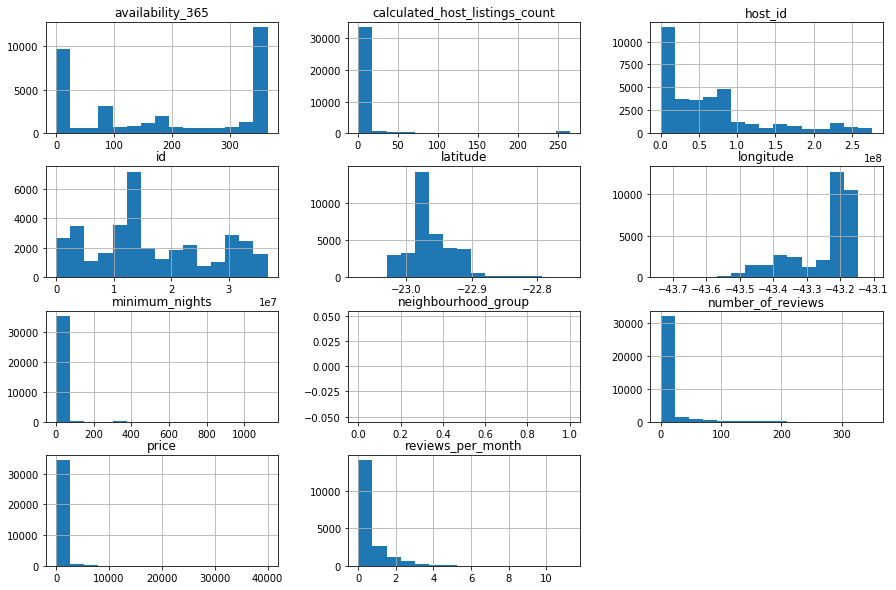

In [0]:
# plotting the histogram from the discrete features
df.hist(bins=15, figsize=(15,10));

### **Q4. Are there outliers?**

Through the histogram distribution, it is possible ot verify hints of the presence of *outliers*. Observe as an example the variables `price`, `minimum_nights` and `calculated_host_listings_count`.

These values do not follow a distribution, and distort all of the graph representation. To make sure that there are outliers, we have two quick ways that help us detecting the *outliers*:

* Statistical synthesis through the `describe()` method
* Plotting `boxplots` for the feature.

In [0]:
# see the statistical synthesis for the discrete variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35451.000000,35451.000000,35451.000000,18979.000000,35451.000000,35451.000000
mean,622.242222,4.735833,7.951962,0.607775,7.884827,190.142648
std,1588.131281,21.958524,22.308053,0.849336,32.626366,151.889963
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,281.000000,2.000000,1.000000,0.230000,1.000000,179.000000
75%,599.000000,4.000000,5.000000,0.790000,2.000000,362.000000
max,40000.000000,1123.000000,350.000000,11.250000,265.000000,365.000000


Through the statistical synthesis above, we can confirm a few hypothesis, such as:

* The `price` feature has 75% under the value 599, yet it's maximum value is 40000.
* The minimum nights we are allowed to book (`minimum_nights`) has it's max value above the feasible limit of 365 days in a year.

#### Boxplot for minimum_nights


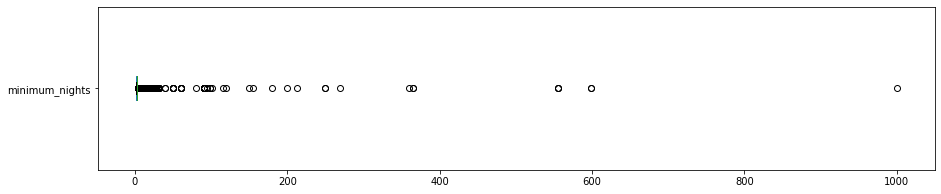

minimum_nights: values above 30:
51 entries
0.3825%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# view amount of values above 30 days for minimum_nights
print("minimum_nights: values above 30:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot for price

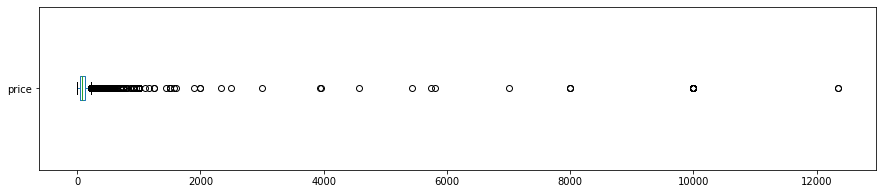


price: values above 1500
31 entries
0.2325%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# view amount of values above 1500 for price
print("\nprice: values above 1500")
print("{} entries".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogram without *outliers*

Since we have already identified *outliers* in the variables `price` and `minimum_nights`, we're now going to clean them out from the *DataFrame* and plot the histogram again.

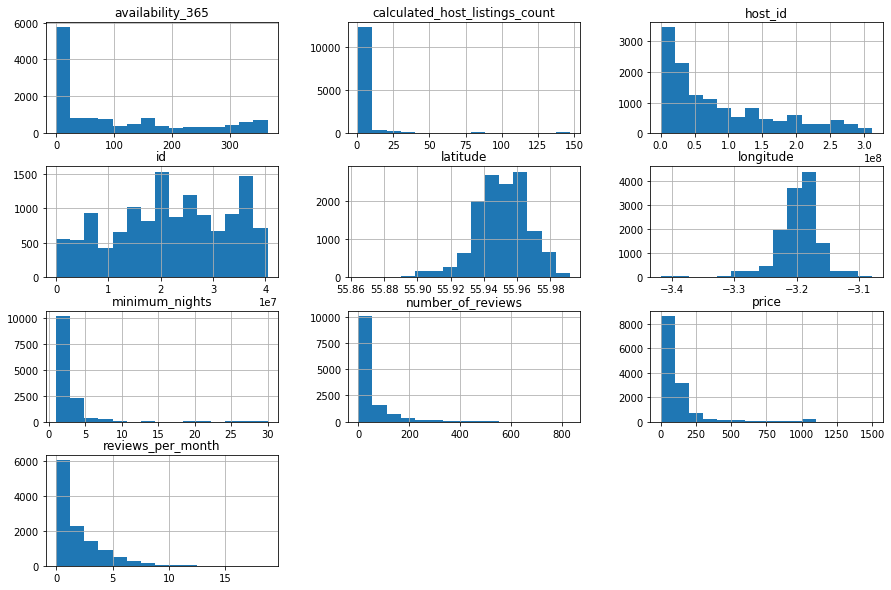

In [0]:
# remove *outliers* in a new DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove `neighbourhood_group`, since it is empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plot the histogram for discrete features
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. What is the existing correlation between features**

Correlation means that there is a relationship between two things. In our context, we're searching for a relationship or similarity between two variables. This relation can be measured, and it is the job of the correlation coefficient to stablish it's intensity. To identify the existing correlations between the interest features, we're going to:

* Create a correlation matrix
* Generate a *heatmap* from that matrix, using the `seaborn` library

In [0]:
# create a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.027891,-0.065640,0.007080,0.094251,0.132840
minimum_nights,-0.027891,1.000000,-0.094617,-0.166021,-0.020332,-0.059094
number_of_reviews,-0.065640,-0.094617,1.000000,0.675832,-0.044240,0.173794
reviews_per_month,0.007080,-0.166021,0.675832,1.000000,0.015363,0.205586
calculated_host_listings_count,0.094251,-0.020332,-0.044240,0.015363,1.000000,0.152908
availability_365,0.132840,-0.059094,0.173794,0.205586,0.152908,1.000000


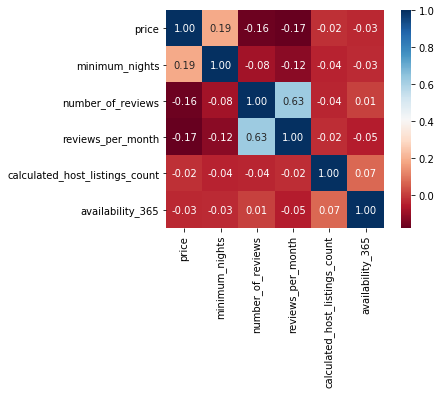

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. What is the most booked property type in our Airbnb *dataset*?**

The column of the feature `room_type` indicates the type of renting that is announced in Airbnb. If you have already booked a property using the site, you know that there are options of entire condos/apartments/houses, the single renting of a room or even sharing the room with other people.

We're going to count the amount of occurrences of each type of rent, using the method `value_counts()`.

In [0]:
# show the quantity of each available property 
df_clean.room_type.value_counts()

Entire home/apt    8211
Private room       4812
Hotel room          198
Shared room          29
Name: room_type, dtype: int64

In [0]:
# show the percentage of each type of available property
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.619698
Private room       0.363170
Hotel room         0.014943
Shared room        0.002189
Name: room_type, dtype: float64

As we can see, for our Edinburgh dataset, the property type which is booked the most is Entire home/apt. This means that out of 10 times people book a place in Edinburgh, 6 of it happens to be the entire place.

### **Q6. What is the most expensive neighbourhood in Edinburgh?**

A way to verify a feature as a function of another feature is through the `groupby()` method. In this case, we want to compare the streets(*neighbourhoods* from the renting price. 

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
The Calders                                  257.388889
Old Town, Princes Street and Leith Street    170.018981
New Town West                                169.810811
Moredun and Craigour                         154.555556
Deans Village                                152.505000
New Town East and Gayfield                   143.971246
Tollcross                                    141.673877
Murrayfield and Ravelston                    139.923077
Fairmilehead                                 134.250000
Balerno and Bonnington Village               133.478261
Name: price, dtype: float64

Above we can see that The Calders has a bigger average price than places such as Old Town, Princes Street and Leith Street.

A person that doesn't know Edinburgh could show these results without questioning herself. As to provide an example of how a sample can be non-representative, let us see how many entries are there for The Calders.

In [0]:
# see the amount of properties in The Calders
print(df[df.neighbourhood == "The Calders"].shape)

# see the first 8 entries for The Calders
df[df.neighbourhood == "The Calders"]

(22, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1366,6574607,DOUBLE BIG BEDROOM IN A LOVELY FRIENDLY FLAT :),34387725,Thiago,NaN,The Calders,55.91877,-3.29214,Private room,17,1,10,2019-02-03,0.18,1,0
2430,10432576,1 bedroom in west edinburgh near airport 12-1,53736254,Dan,NaN,The Calders,55.92196,-3.29308,Private room,999,599,3,2017-05-28,0.07,5,365
2687,12155244,double room to rent for August,65270182,Joanna,NaN,The Calders,55.92070,-3.29814,Private room,32,14,0,NaN,NaN,1,252
3433,13930036,"a double room near airport ,heriot watt 12-2",53736254,Dan,NaN,The Calders,55.92114,-3.29423,Private room,999,555,1,2017-05-28,0.03,5,365
5002,18882037,1 double bed room near airport 35 bus,53736254,Dan,NaN,The Calders,55.91955,-3.29647,Private room,999,599,2,2017-06-01,0.07,5,365
5021,18914400,a double bed room near airport 35bus tesco,131824828,Dan,NaN,The Calders,55.92000,-3.29452,Private room,999,1,1,2017-07-14,0.03,2,0
5187,19179102,"a double bed room near heriot watt, airport 32",131824828,Dan,NaN,The Calders,55.92156,-3.29364,Private room,999,1,0,NaN,NaN,2,0
5423,19536606,Edinburgh 2 bedroom house free parking,125296161,Andrew,NaN,The Calders,55.91603,-3.29007,Entire home/apt,79,2,74,2019-11-03,2.63,1,324
6061,20200443,"Affordable Short Stay, Edinburgh.",143868296,Paul,NaN,The Calders,55.91899,-3.29439,Private room,35,1,2,2017-08-26,0.07,1,0
6713,21998435,Private Stylish Room in Edinburgh,105290948,Ana,NaN,The Calders,55.92071,-3.29339,Private room,100,5,2,2018-01-22,0.09,9,0


Since we are given the georreferencing coordinates for the properties, it is possible to plot each point. For this, we consider `x=longitude` and `y=latitude`.

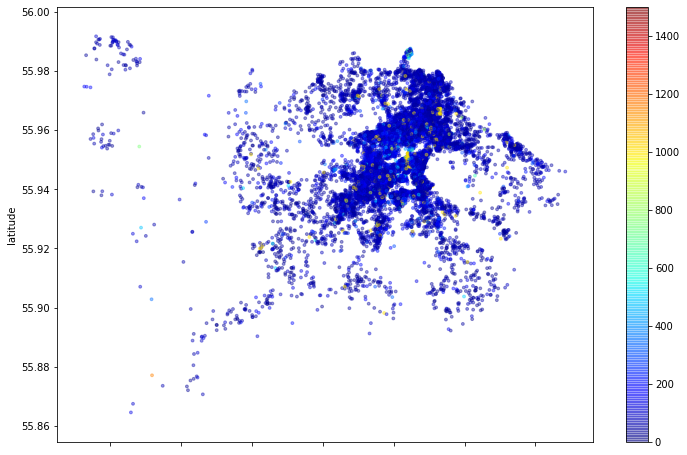

In [0]:
# plot the properties as per latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusion

We did only a superficial analysis from Airbnb's database, yet we have already perceived that there are *outliers* in some of the features. 

We have noticed as well that in some neighbourhoods where there are few available properties which can distort the statistical information from some features.

Finally, we remind you that this *dataset* is a synthesized vresion, functional only for a starting approach. We recommend that you use, in a future exploratory analysis, the whole dataset, with 106 available features.

This analysis was done as an exercise on the **Data Science na Pratica** course, teached by **Carlos Melo** [sigmoidal.ai](https://sigmoidal.ai) [GitHub](https://github.com/carlosfab) [Twitter](https://twitter.com/carlos_fab) [Youtube](https://www.youtube.com/channel/UCxaCu5ht7d3jvisTpiW6vxw).